# Car Reviews Classification

In [407]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter

In [408]:
car_reviews = pd.read_csv('car-reviews.csv')

In [409]:
car_reviews.head()

,Sentiment,Review
0,Neg,In 1992 we bought a new Taurus and we really ...
1,Neg,The last business trip I drove to San Franci...
2,Neg,My husband and I purchased a 1990 Ford F250 a...
3,Neg,I feel I have a thorough opinion of this truc...
4,Neg,AS a mother of 3 all of whom are still in ca...


# Part 1

Demonstrate that words and punctuation, which are unlikely to affect sentiment, have been excluded from the sentiment classifier AND that the remaining words are not being handled in a case sensitive way.


In [410]:
import string
import nltk
from nltk.stem.porter import *
import spacy



'''Function that takes in a column and returns the vocabulary found'''

def processTextColumn(column):
    corpus = []
    all_stems = []
    stems_per_review = []
    stem_duplicates = []
    docs = []
    polarities = []
    
    spacy_nlp = spacy.load('en_core_web_sm')
    spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
    
    for text in column: 
        review_stems = ''
        doc = spacy_nlp(text)
        
        text = strip(text)
        for t in text: 
            stem = getStem(t)
            if stem not in review_stems: 
                review_stems += stem + ' '
            if t not in spacy_stopwords:
                if t not in corpus: 
                    corpus.append(t)
                if stem not in all_stems: 
                    all_stems.append(stem)
                else: 
                    stem_duplicates.append(t)
                    
        docs.append(doc)
        stems_per_review.append(review_stems)

    return corpus, all_stems, docs, stem_duplicates, stems_per_review
    
'''
A Method to Strip a block of text of punctuation and return each word as a token
'''
def strip(text):
    output = [x.lower() for x in text.translate(str.maketrans('', '', string.punctuation)).split()]
    return output

'''
A Method that taskes in a word and returns the appropriate stem for that word, ensuring we appropraitely recognise and treat 
treat words of the same stem as the same
'''

def getStem(t):
    stemmer = PorterStemmer()
    return stemmer.stem(t)
    

In [411]:
corpus, stems, docs, stem_duplicates, stems_per_review = processTextColumn(car_reviews['Review'])

In [412]:
len(corpus)

16612

In [413]:
len(stems)

10916

In [414]:
# Creating a Stem Dict 
stem_dic = {s: [] for s in stems}

for w in corpus: 
    key = getStem(w)
    stem_dic[key].append(w)

stem_dic

{'1992': ['1992', '1992s'],
 'bought': ['bought'],
 'new': ['new'],
 'tauru': ['taurus'],
 'love': ['loved', 'love', 'lovely', 'loves', 'loving'],
 '1999': ['1999', '1999s'],
 'decid': ['decided', 'decide', 'decides', 'deciding'],
 'tri': ['try', 'trying', 'tried', 'tries', 'tryed', 'tri'],
 'care': ['care', 'careful', 'cared', 'carefully', 'cares', 'caring'],
 'style': ['style', 'styling', 'styled', 'styles', 'stylings'],
 'newer': ['newer'],
 'version': ['version', 'versions'],
 'like': ['like', 'liked', 'likely', 'liking', 'likeness', 'likes'],
 'car': ['car', 'cars', 'carring'],
 'half': ['half'],
 'thee': ['thee'],
 'dash': ['dash', 'dashes'],
 'deep': ['deep', 'deepness'],
 'take': ['takes', 'taking'],
 'lot': ['lot', 'lots'],
 'room': ['room'],
 'find': ['find', 'finding', 'finds', 'findings'],
 'seat': ['seats', 'seat', 'seating', 'seated'],
 'comfort': ['comfortable',
  'comfort',
  'comforts',
  'comfortably',
  'comforting'],
 'way': ['way', 'ways'],
 'side': ['sides', 'side

The submission demonstrates that words with the same stem have been appropriately recognised and treated as variations of the stem? 

In [415]:
stem_dic[getStem('Fault')]

['fault', 'faults']

In [416]:
stem_dic[getStem('Computer')]

['computer', 'computers']

In [417]:
stem_dic[getStem('Car')]

['car', 'cars', 'carring']

In [418]:
car_reviews['Stems'] = stems_per_review

In [419]:
car_reviews.head()

,Sentiment,Review,Stems
0,Neg,In 1992 we bought a new Taurus and we really ...,in 1992 we bought a new tauru and realli love ...
1,Neg,The last business trip I drove to San Franci...,the last busi trip drove to san francisco went...
2,Neg,My husband and I purchased a 1990 Ford F250 a...,my husband i purchas 1990 ford f250 had noth b...
3,Neg,I feel I have a thorough opinion of this truc...,i feel have thorough opinion of thi truck comp...
4,Neg,AS a mother of 3 all of whom are still in ca...,as mother of 3 all whom are still in carseat o...


Does the code produce some output to demonstrate that a vector has been created for each review, where each element in the vector represents EITHER a binary variable indicating the presence of a word/stem in a review OR the number of times that a word (or word stem) appears? Note that the output does not need to show the vector for all reviews, this only needs to contain a small sample of reviews.

In [420]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(car_reviews['Stems'])
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [421]:
vectors = [x for x in X.toarray()]

In [422]:
car_reviews['Vector'] = vectors

In [423]:
car_reviews.head()

,Sentiment,Review,Stems,Vector
0,Neg,In 1992 we bought a new Taurus and we really ...,in 1992 we bought a new tauru and realli love ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,Neg,The last business trip I drove to San Franci...,the last busi trip drove to san francisco went...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,Neg,My husband and I purchased a 1990 Ford F250 a...,my husband i purchas 1990 ford f250 had noth b...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,Neg,I feel I have a thorough opinion of this truc...,i feel have thorough opinion of thi truck comp...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,Neg,AS a mother of 3 all of whom are still in ca...,as mother of 3 all whom are still in carseat o...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [424]:
len(X.toarray()[0])

10995

In [425]:
y = [1 if x=='Pos' else 0 for x in car_reviews['Sentiment']]

In [426]:
y[0:5]

[0, 0, 0, 0, 0]

In [427]:
y[len(y) - 5:]

[1, 1, 1, 1, 1]

Does the code clearly show that 80% of the data has been used to train the classification model, and that the remaining 20% of the data set has been used as test data? AND does it show that only the training data has been used up to the point where the model has been trained (no test data)? AND is the code able to cope with words that appear in the test data but not in the training dataset?

In [428]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# With this method, we are able to use only the training data up to the point where the model has been trained and test it 
# the appropriate test data
def run(clf, test_X, test_y): 
    total = 0 
    
    y_pred = []
    y_true = test_y
    y_correct = []
    
    for x, y in zip(test_X, test_y): 
        pred = clf.predict(x)
        y_pred.append(pred)
        if pred == y: 
            total += 1
            y_correct.append(1)
        else: 
            y_correct.append(0)
            
   # c_m = confusion_matrix(y_true, y_pred)
    accuracy = total / test_X.shape[0]

    return y_pred, accuracy, #c_m

def print_confusion(confusion_matrix):
    print('True Positive ' + str(confusion_matrix[0][0]))
    print('False Positive ' + str(confusion_matrix[0][1]))
    print('True Negative ' + str(confusion_matrix[1][0]))
    print('False Negative ' + str(confusion_matrix[1][1]))


In [429]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Does the code clearly show that an appropriate Naïve Bayes model has been used for classification, either through the use of an existing library or coded from scratch

In [430]:
from sklearn.naive_bayes import MultinomialNB
mn_clf = MultinomialNB()
mn_clf.fit(X_train, y_train)
output, accuracy  = run(mn_clf, X_test, y_test)


In [431]:
accuracy

0.7978339350180506

In [432]:
mn_cm = confusion_matrix(y_test, output)

In [433]:
print_confusion(mn_cm)

True Positive 104
False Positive 32
True Negative 24
False Negative 117


# Part 2

Does the Jupyter notebook include a markdown/comment section that clearly explains how the approach taken in part two is expected to improve on the solution to part one. Are the reasons for the expected improvements clearly justified and explained with one or more references (e.g. to a published source scientific paper, article, book)?

# Improving Classification Accuracy

In order to improve the solution from section 1, I will implement an ensemble method of algorithms. Ensemble methods can be used to improve the accuracy of statistical predictive models (Bulhmann 2012), which is what is the desired for the following section. 

Ensemble methods allows us to construct a linear collection of models fitting methods, instead of just using a single model. 

An example of an ensemble method is bagging, or boostrap aggregation. Breiman (1996) writes, "If perturbing the learning set can cause significant changes in the predictor constructed, then bagging can improve accuracy."

As such, I will explore if a bagging ensemble method of Bagging and evaluate the model using repeated stratified k folds. This is expected to improve on the predictive performance of the previous section by ensuring reliability of the predictions and ensuring the stability/robustness of the model.



In [434]:
#IMPORTING RELEVANT MODULES
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from numpy import mean
from numpy import std

In [435]:
#DEFINE BAGGING CLASSIFIER
bagging_clf = BaggingClassifier()

# First I will evaluate the Bagging Classifier only -

In [436]:
bagging_clf.fit(X_train, y_train)

BaggingClassifier()

In [437]:
bag_output, accuracy  = run(bagging_clf, X_test, y_test)

In [438]:
accuracy

0.703971119133574

In [439]:
bagging_cm = confusion_matrix(y_test, bag_output)

In [440]:
# Bagging Confusion Matrix
print_confusion(bagging_cm)

True Positive 96
False Positive 40
True Negative 42
False Negative 99


# Now I will perform Bagging with K Fold Cross Validation 

In [441]:
bagging_clf_2 = BaggingClassifier()
k = 20
#EVALUATE BAGGING CLASSIFIER WITH K FOLDS
cv = RepeatedStratifiedKFold(n_splits=k, n_repeats=3, random_state=1)

In [442]:
b_scores = cross_val_score(bagging_clf_2, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [443]:
print('Accuracy: %.3f (%.3f)' % (mean(b_scores), std(b_scores)))

Accuracy: 0.703 (0.055)


In [444]:
# Highest Accuracy 
max(b_scores)

0.8405797101449275

In [445]:
# Lowest Accuracy 
min(b_scores)

0.5797101449275363

# Evaluating Naive Bayes with K-Fold Cross Validation 

In [446]:
mn_2 = MultinomialNB()

In [447]:
#EVALUATE BAGGING CLASSIFIER WITH K FOLDS
cv_2 = RepeatedStratifiedKFold(n_splits=k, n_repeats=3, random_state=1)

In [448]:
mn_scores = cross_val_score(mn_2, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [449]:
print('Accuracy: %.3f (%.3f)' % (mean(mn_scores), std(mn_scores)))

Accuracy: 0.791 (0.050)


In [450]:
# Highest Accuracy 
max(mn_scores)

0.8985507246376812

In [451]:
# Lowest Accuracy 
min(mn_scores)

0.6666666666666666

## Discuss and compare the performance of the part one and part two classification approaches and explains whether or not the expected improvements were achieved (and why this may be the case).


## Conclusion

When comparing the single instance of Naive Bayes and the Bagging model, and when comparing evaluation through K-fold cross validation, it has become clear that Naive Bayes has a higher average predictive performance. 

Bagging is shown to smooth decision trees for classifiers, yielding smaller variance and mean squared error (Bulhmann and Yu, 2002). However, with this smoothing taking place, Naive Bayes still produces a predictive performance greater than that of Bagging, whilst being less computationally expensive and a simpler model to implement. 

Schneider (2005) argues that, "performance [for naive bayes] is often degraded because it does not model text well, and by inappropriate feature selection and the lack of reliable confidence scores. The features were simply the corpus determined in section one. This may not be the best feature selection process and N-gram or TF-IDF may be more suitable in the future. I have implemented an illustration potential features to explore in the future, located in the next section. 

Below is a visualisation of the two models predictive performance: 

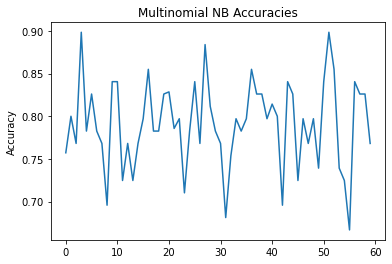

In [452]:
import matplotlib.pyplot as plt

mn_y = mn_scores 
b_y = b_scores
iterations = [x for x in range(len(mn_scores))]

plt.plot(iterations, mn_y)
plt.ylabel('Accuracy')
plt.title('Multinomial NB Accuracies')
plt.show()

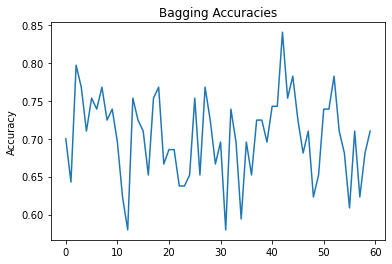

In [453]:
plt.plot(iterations, b_y)
plt.ylabel('Accuracy')
plt.title('Bagging Accuracies')
plt.show()

## Interesting point, NLP - Sentiment Analysis using polarities and subjectivities of each review

In [454]:
# Performing NLP sentiment analysis, obtaining the polariites and subjectivities of each review and visualising them

import spacy
from spacytextblob.spacytextblob import SpacyTextBlob


polarities = []
subjectivities = []
assessments = []

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
    
for s, r in zip(car_reviews['Sentiment'], car_reviews['Review']): 
    text = r
    doc = nlp(text)
    polarities.append(doc._.polarity)
    subjectivities.append(doc._.subjectivity)
    assessments.append(doc._.assessments)

In [455]:
car_reviews['Mean Polarity'] = polarities

In [456]:
car_reviews['Mean Polarity'].describe()

count    1382.000000
mean        0.141520
std         0.104851
min        -0.312121
25%         0.075372
50%         0.138879
75%         0.204485
max         0.520833
Name: Mean Polarity, dtype: float64

In [457]:
car_reviews['Mean Subjectivity'] = subjectivities

### Visualisation of Mean Polarity of the document

<AxesSubplot:xlabel='Mean Polarity', ylabel='Sentiment'>

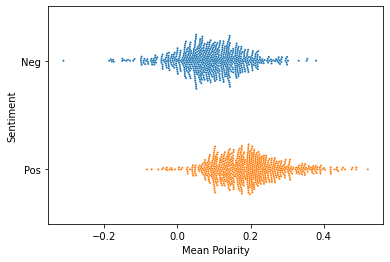

In [458]:
import seaborn as sns

sns.swarmplot(x=car_reviews['Mean Polarity'], y=car_reviews['Sentiment'], s=2)

### Visualisation of Subjectivities of the document

<AxesSubplot:xlabel='Mean Subjectivity', ylabel='Sentiment'>

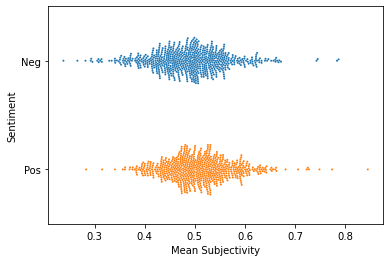

In [460]:
sns.swarmplot(x=car_reviews['Mean Subjectivity'], y=car_reviews['Sentiment'], s=2)

# References

Breiman, L. Bagging predictors. Mach Learn 24, 123–140 (1996). https://doi.org/10.1007/BF00058655

Bühlmann, P. Yu, B. "Analyzing bagging." Ann. Statist. 30 (4) 927 - 961, August 2002. https://doi.org/10.1214/aos/1031689014

Bühlmann P. (2012) Bagging, Boosting and Ensemble Methods. In: Gentle J., Härdle W., Mori Y. (eds) Handbook of Computational Statistics. Springer Handbooks of Computational Statistics. Springer, Berlin, Heidelberg. https://doi.org/10.1007/978-3-642-21551-3_33

Schneider KM. (2005) Techniques for Improving the Performance of Naive Bayes for Text Classification. In: Gelbukh A. (eds) Computational Linguistics and Intelligent Text Processing. CICLing 2005. Lecture Notes in Computer Science, vol 3406. Springer, Berlin, Heidelberg. https://doi.org/10.1007/978-3-540-30586-6_76

